Creating data visualizations for the aggregated ratings

In [67]:
import pandas as pd
import numpy as np

df = pd.read_csv('aggregated_ratings.csv')

In [68]:
df = df.set_index('id')
df

,light_rag,hippo_rag,gpt_4o_no_rag
id,,,
2,1,2,3
3,3,2,3
4,3,3,3
5,2,3,2
6,1,1,2
7,3,2,2
8,2,3,1
9,3,3,1
10,3,1,1


In [69]:
# graph data
# count of each column by rating
# ratings can be between 1-3. for each value, count the number of times it appears in each column. display as a graph
new_df = pd.DataFrame()
new_df['light_rag'] = df['light_rag'].groupby(df['light_rag']).count()
new_df['light_rag'] = new_df['light_rag'].astype(int)
new_df['hippo_rag'] = df['hippo_rag'].groupby(df['hippo_rag']).count()
new_df['hippo_rag'] = new_df['hippo_rag'].astype(int)
new_df['gpt_4o_no_rag'] = df['gpt_4o_no_rag'].groupby(df['gpt_4o_no_rag']).count()
new_df['gpt_4o_no_rag'] = new_df['gpt_4o_no_rag'].astype(int)
new_df.index = ['1', '2', '3']
# rename the index to be the rating
new_df.index.name = 'rating'
new_df

,light_rag,hippo_rag,gpt_4o_no_rag
rating,,,
1,6,6,10
2,6,4,6
3,9,11,5


/var/folders/4k/md3x6nh51lq_7wqrq7w6f3hc0000gn/T/ipykernel_82225/2811045012.py:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/4k/md3x6nh51lq_7wqrq7w6f3hc0000gn/T/ipykernel_82225/2811045012.py:27: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/4k/md3x6nh51lq_7wqrq7w6f3hc0000gn/T/ipykernel_82225/2811045012.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



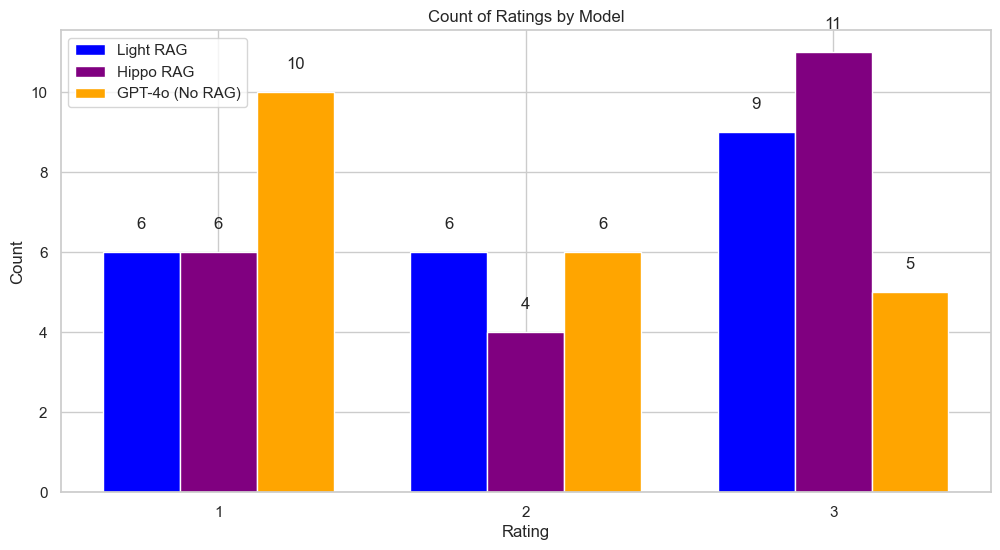

In [75]:
# graph new_df
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# plot the data
x = np.arange(len(new_df.index))  # the label locations
width = 0.25  # the width of the bars

# increase text size

plt.bar(x - width, new_df['light_rag'], width, label='Light RAG', color='blue')
plt.bar(x, new_df['hippo_rag'], width, label='Hippo RAG', color='purple')
plt.bar(x + width, new_df['gpt_4o_no_rag'], width, label='GPT-4o (No RAG)', color='orange')

plt.title('Count of Ratings by Model')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(x, new_df.index)  # set the x-axis labels
plt.legend()
plt.savefig('ratings_count.png')
plt.rcParams.update({'font.size': 12})
# put text on top of the bars
for i in range(len(new_df.index)):
    plt.text(i - width, new_df['light_rag'][i] + 0.5, str(new_df['light_rag'][i]), ha='center', va='bottom')
    plt.text(i, new_df['hippo_rag'][i] + 0.5, str(new_df['hippo_rag'][i]), ha='center', va='bottom')
    plt.text(i + width, new_df['gpt_4o_no_rag'][i] + 0.5, str(new_df['gpt_4o_no_rag'][i]), ha='center', va='bottom')
plt.show()



In [77]:
new_df_1 = new_df.transpose()
new_df_1

rating,1,2,3
light_rag,6,6,9
hippo_rag,6,4,11
gpt_4o_no_rag,10,6,5


In [78]:
# create a bar graph of the counts of each rating for each model
import plotly.express as px
fig = px.bar(new_df_1, x=new_df_1.index, y=new_df_1.columns, barmode='group', title='Count of Ratings by Model')
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Count',
    legend_title_text='Rating'
)
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_traces(textfont_size=12)
fig.update_traces(marker=dict(line=dict(width=0)))  # remove the lines around the bars
fig.update_traces(textfont_color='black')  # set the text color to black
fig.update_traces(textposition='outside')  # set the text position to outside
fig.update_traces(textfont=dict(size=12))  # set the text font size
# remove the datatips from the boxplot


In [87]:
fig = px.bar(new_df, x=new_df.index, y=new_df.columns, barmode='group', title='Count of Ratings by Model')
fig.update_layout(
    xaxis_title='Rating (1-3)',
    yaxis_title='Count',
    legend_title_text='Model'
)
fig.update_traces(texttemplate='%{value}', textposition='outside')
fig.update_traces(textfont_size=12)
fig.update_traces(marker=dict(line=dict(width=0)))  # remove the lines around the bars
fig.update_traces(textfont_color='black')  # set the text color to black
fig.update_traces(textposition='outside')  # set the text position to outside
fig.update_traces(textfont=dict(size=12))  # set the text font size
# increase the size of the text
fig.update_layout(font=dict(size=14))
